In [5]:
# Used for unpickling byte stream of python objects on file system/disk
import pickle
# Used for decompressing .gzip files from file system/disk
import gzip
# Used for array operations
import numpy as np

Loading MNIST Dataset

In [18]:
%pip install google-colab

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement google-colab (from versions: none)
ERROR: No matching distribution found for google-colab

[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: e:\Program data\Python\python.exe -m pip install --upgrade pip


In [6]:
#from google.colab import drive
#drive.mount('/content/drive')

# Opening and decompressing .gzip file
filename = 'mnist.pkl.gz'
f = gzip.open(filename, 'rb')

# Unpickling .pkl file saved as byte stream on disk to python objects
trainingData, validationData, testingData = pickle.load(f, encoding='latin1')
f.close()

# Training feature vectors and training target extracted from trainingData (target represented using one-hot format)
trainingTarget = np.array([1 if  trainingData[1][i] == t else 0  for i in range(len(trainingData[1])) for t in range(10)]).reshape(-1,10)
trainingData = trainingData[0]

# Validation feature vectors and validation target extracted from validationData
validationTarget = validationData[1]
validationData = validationData[0]

# Testing feature vectors and testing target extracted from testingData
testingTarget = testingData[1]
testingData = testingData[0]

Loading USPS Dataset

In [7]:
# Used to open image in file system/disk
from PIL import Image
# Used to navigate to required directory in the file system
import os
# Used to convert image data to array
import numpy as np

In [8]:
USPSMat  = []
USPSTar  = []
curPath  = 'D:/Ghozy/Tel-U/AI Lab/CV digit recognition/USPSdata/USPSdata/Numerals'
savedImg = []

# Navigate to the 10 folders containing images for 10 labels
for j in range(0,10):
    curFolderPath = curPath + '/' + str(j)
    imgs =  os.listdir(curFolderPath)
    for img in imgs:
        curImg = curFolderPath + '/' + img
        if curImg[-3:] == 'png':

            # Open image resize it, and save image array as well as labels in 2 lists
            img = Image.open(curImg,'r')
            img = img.resize((28, 28))
            savedImg = img
            imgdata = (255-np.array(img.getdata()))/255
            USPSMat.append(imgdata)
            USPSTar.append(j)

Neural Networks

In [2]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/385.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/385.0 MB 5.6 MB/s eta 0:01:09
   ---------------------------------------- 1.3/385.0 MB 4.0 MB/s eta 0:01:37
   ---------------------------------------- 1.6/385.0 MB 3.4 MB/s eta 0:01:55
   ---------------------------------------- 1.8/385.0 MB 2.4 MB/s eta 0:02:40
   ---------------------------------------- 1.8/385.0 MB 2.4 MB/s eta 0:02:40
   ---------------------------------------- 2.1/385.0 MB 2.0 MB/s eta 0:03:16
   ---------------------------------------- 2.4/385.0 MB 1.7 MB/s eta 0:03:40
   ---------------------------------------- 2.6/385.0 MB 1.6 MB/s eta 0:03:58
   ---------------------------------------- 2.9/385.0 MB 1.6 MB/s eta 0:04:06
   ---------------------------------------- 3.1/385.0 MB 1.5 MB/s eta 0:04:09
   ---------------------------------------- 3.7/385.0 MB 1.6 MB/s eta 0

In [2]:
pip install --upgrade keras

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: e:\Program data\Python\python.exe -m pip install --upgrade pip


In [3]:
import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten

In [9]:
#DNN
num_classes = len(trainingTarget[0])
DNNclassifier = Sequential()
DNNclassifier.add(Dense(units=200, activation='relu', input_shape=(len(trainingData[0]),)))
DNNclassifier.add(Dropout(0.2))
DNNclassifier.add(Dense(units=200, activation='relu'))
DNNclassifier.add(Dropout(0.2))
# DNNclassifier.add(Dense(units=200, activation='relu'))
# DNNclassifier.add(Dropout(0.2))
DNNclassifier.add(Dense(units=num_classes, activation='softmax'))
DNNclassifier.compile(optimizer='Adamax', loss='categorical_crossentropy',metrics=['accuracy'])
history = DNNclassifier.fit(trainingData, trainingTarget, batch_size=128, epochs=100,
verbose=False,validation_data=(validationData, keras.utils.to_categorical(validationTarget, num_classes)))

C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
pip install -U matplotlib

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/7.8 MB 2.8 MB/s eta 0:00:03
   ------ --------------------------------- 1.3/7.8 MB 3.2 MB/s eta 0:00:03
   ------------ --------------------------- 2.4/7.8 MB 3.8 MB/s eta 0:00:02
   ---------------- ----------------------- 3.1/7.8 MB 3.9 MB/s eta 0:00:02
   ----------------- ---------------------- 3.4/7.8 MB 3.9 MB/s eta 0:00:02
   --------------------- ------------------ 4.2/7.8 MB 3.5 MB/s eta 0:00:02
   ------------------------- -------------- 5.0/7.8 MB 3.4 MB/s eta 0:00:01
   -------------------------------- ------- 6.3/7.8 MB 3.6 MB/s eta 0:00:01
   -------------------------------------- - 7.6/7.8 MB 3.8 MB/s eta 0:00:01
   -------------------------------------- - 7.6/7.8 MB 3.8 MB/s eta 0:00:01
   -------------------------------------- - 7.6/7.8 MB 3.8 MB/s eta 0:00:01
   --------------

In [14]:
from sklearn.metrics import confusion_matrix

loss,valAccuracy = DNNclassifier.evaluate(validationData, keras.utils.to_categorical(validationTarget, num_classes), verbose=False)
loss,testAccuracy = DNNclassifier.evaluate(testingData, keras.utils.to_categorical(testingTarget, num_classes), verbose=False)
loss,testUSPSAccuracy = DNNclassifier.evaluate(np.array(USPSMat), keras.utils.to_categorical(USPSTar, num_classes), verbose=False)
dnnMNISTPrediction = np.argmax(DNNclassifier.predict(testingData), axis=1)
dnnUSPSPrediction = np.argmax(DNNclassifier.predict(np.array(USPSMat)), axis=1)

print ('---------------DNN----------------\n')
print('Validation accuracy    = ', valAccuracy*100)
print('MNIST Testing accuracy = ', testAccuracy*100)
print('USPS Testing accuracy  = ', testUSPSAccuracy*100,'"\n"')
print("\nMNIST Confusion Matrix: \n\n",confusion_matrix(testingTarget, dnnMNISTPrediction))
print("\nUSPS Confusion Matrix: \n\n",confusion_matrix(USPSTar, dnnUSPSPrediction))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
---------------DNN----------------

Validation accuracy    =  98.29999804496765
MNIST Testing accuracy =  98.47000241279602
USPS Testing accuracy  =  47.82739281654358 "
"

MNIST Confusion Matrix: 

 [[ 973    1    0    1    0    0    2    1    2    0]
 [   0 1125    4    1    0    0    2    1    2    0]
 [   1    1 1020    1    1    0    0    3    5    0]
 [   0    0    4  994    0    3    0    3    2    4]
 [   1    0    2    0  969    0    4    2    1    3]
 [   2    0    0    9    1  871    3    1    3    2]
 [   3    2    1    1    3    2  945    0    1    0]
 [   1    1   11    1    1    0    0 1008    1    4]
 [   1    0    1    4    4    1    3    2  953    5]
 [   3    2    0    2    7    1    0    4    1  989]]

USPS Confusion Matrix: 

 [[ 536    6  191   34  138  160  218  388   93  236]
 [  31  468  506   88  337   65   22  358   92   33]
 [  27    6 1655   64   16   61   97   38   33    2]
 

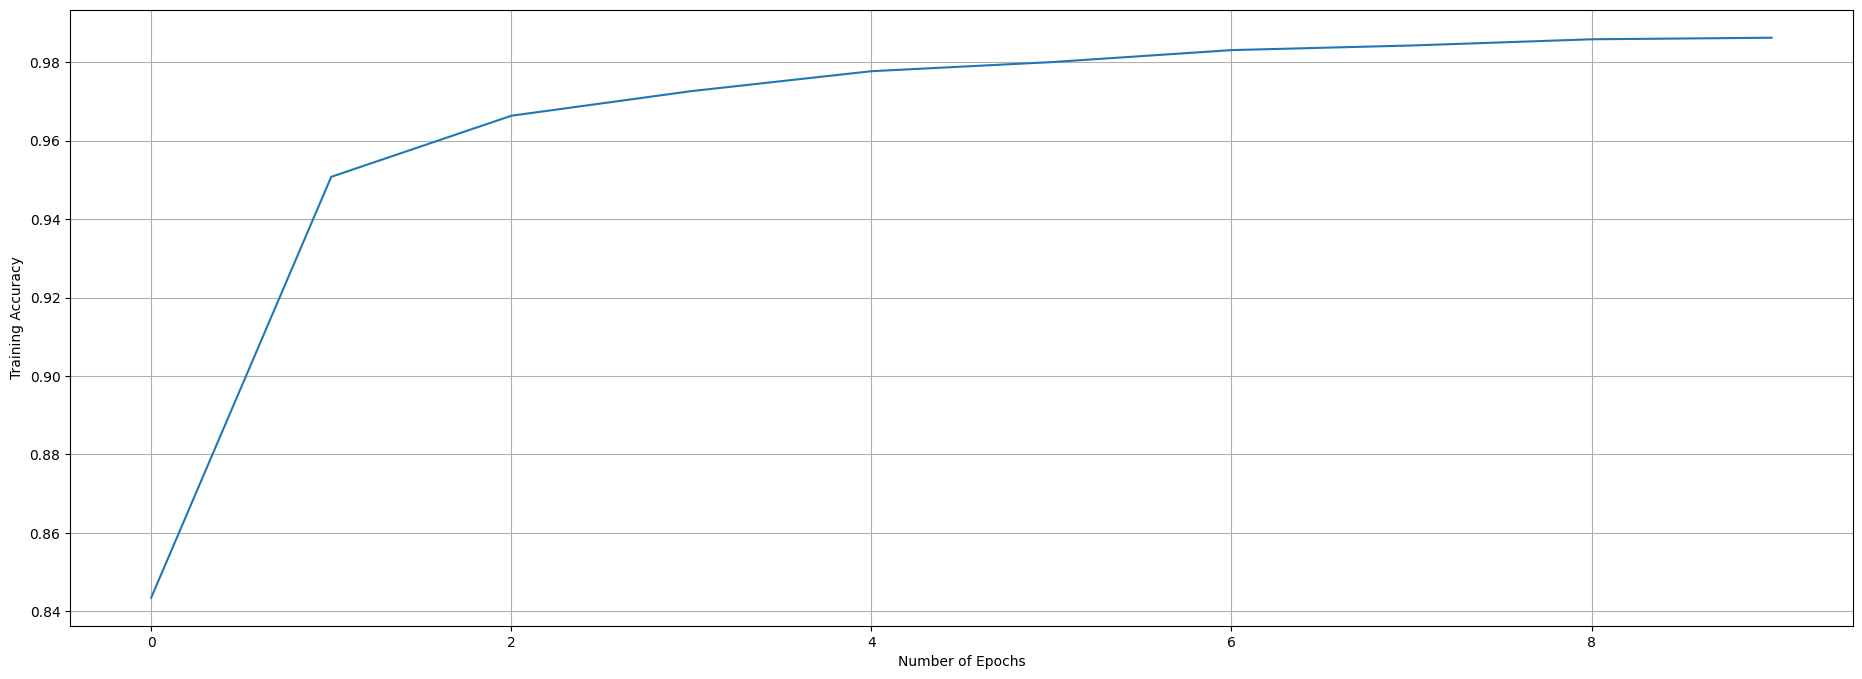

In [21]:
# The matplotlib package is used for plotting graphs
import matplotlib
import matplotlib.pyplot as plt
# Outputs training accuracy and loss against epochs
fig2, ax2=plt.subplots(figsize=(23,8))
ax2.plot(history.history['accuracy'])
ax2.set(xlabel='Number of Epochs', ylabel='Training Accuracy')
ax2.grid()
plt.show()

In [18]:
#CNN
CNNclassifier = Sequential()
CNNclassifier.add(Conv2D(20, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
CNNclassifier.add(MaxPooling2D(pool_size=(2, 2)))
CNNclassifier.add(Conv2D(20, (3, 3), activation='relu'))
CNNclassifier.add(MaxPooling2D(pool_size=(2, 2)))
CNNclassifier.add(Flatten())
CNNclassifier.add(Dense(units=200, activation='relu'))
CNNclassifier.add(Dropout(0.2))
CNNclassifier.add(Dense(units=200, activation='relu'))
CNNclassifier.add(Dropout(0.2))
CNNclassifier.add(Dense(units=num_classes, activation='softmax'))
CNNclassifier.compile(optimizer='Adamax', loss='categorical_crossentropy',metrics=['accuracy'])
history = CNNclassifier.fit(trainingData.reshape(-1, 28, 28, 1), trainingTarget, batch_size=128, epochs=10,
verbose=True,validation_data=(validationData.reshape(-1, 28, 28, 1), keras.utils.to_categorical(validationTarget, num_classes)))

C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.7048 - loss: 0.9619 - val_accuracy: 0.9564 - val_loss: 0.1433
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.9466 - loss: 0.1758 - val_accuracy: 0.9714 - val_loss: 0.0926
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9638 - loss: 0.1153 - val_accuracy: 0.9782 - val_loss: 0.0698
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9717 - loss: 0.0893 - val_accuracy: 0.9832 - val_loss: 0.0585
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9771 - loss: 0.0738 - val_accuracy: 0.9834 - val_loss: 0.0553
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9803 - loss: 0.0649 - val_accuracy: 0.9855 - val_loss: 0.0507
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9832 - loss: 0.0566 - val_accuracy: 0.9868 - val_loss: 0.0474
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9842 - loss: 0.0498 - val_

In [19]:
loss,valAccuracy = CNNclassifier.evaluate(validationData.reshape(-1, 28, 28, 1), keras.utils.to_categorical(validationTarget, num_classes), verbose=False)
loss,testAccuracy = CNNclassifier.evaluate(testingData.reshape(-1, 28, 28, 1), keras.utils.to_categorical(testingTarget, num_classes), verbose=False)
loss,testUSPSAccuracy = CNNclassifier.evaluate(np.array(USPSMat).reshape(-1, 28, 28, 1), keras.utils.to_categorical(USPSTar, num_classes), verbose=False)
cnnMNISTPrediction = np.argmax(CNNclassifier.predict(testingData.reshape(-1, 28, 28, 1)), axis=1)
cnnUSPSPrediction = np.argmax(CNNclassifier.predict(np.array(USPSMat).reshape(-1, 28, 28, 1)), axis=1)

print ('---------------CNN----------------\n')
print('Validation accuracy    = ', valAccuracy*100)
print('MNIST Testing accuracy = ', testAccuracy*100)
print('USPS Testing accuracy  = ', testUSPSAccuracy*100,"\n")
print("\nMNIST Confusion Matrix: \n\n",confusion_matrix(testingTarget, cnnMNISTPrediction))
print("\nUSPS Confusion Matrix: \n\n",confusion_matrix(USPSTar, cnnUSPSPrediction))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
---------------CNN----------------

Validation accuracy    =  98.7999975681305
MNIST Testing accuracy =  98.9300012588501
USPS Testing accuracy  =  63.88319134712219 


MNIST Confusion Matrix: 

 [[ 975    0    0    0    0    0    2    1    2    0]
 [   0 1134    0    0    0    0    1    0    0    0]
 [   0    1 1023    1    0    0    0    5    2    0]
 [   0    0    2 1000    0    2    0    1    4    1]
 [   0    1    1    0  974    0    0    0    2    4]
 [   2    0    1    4    0  878    2    1    2    2]
 [   4    2    0    0    4    2  945    0    1    0]
 [   0    3    5    2    0    0    0 1013    1    4]
 [   3    0    1    3    1    0    0    2  961    3]
 [   3    3    1    2    5    2    0    1    2  990]]

USPS Confusion Matrix: 

 [[ 625    1   78   24  240    8   39    7  108  870]
 [  24  859   82   20  399    7   31  468   78   32]
 [  26    3 1726   93   12   27   20   14   74    4]
 [   

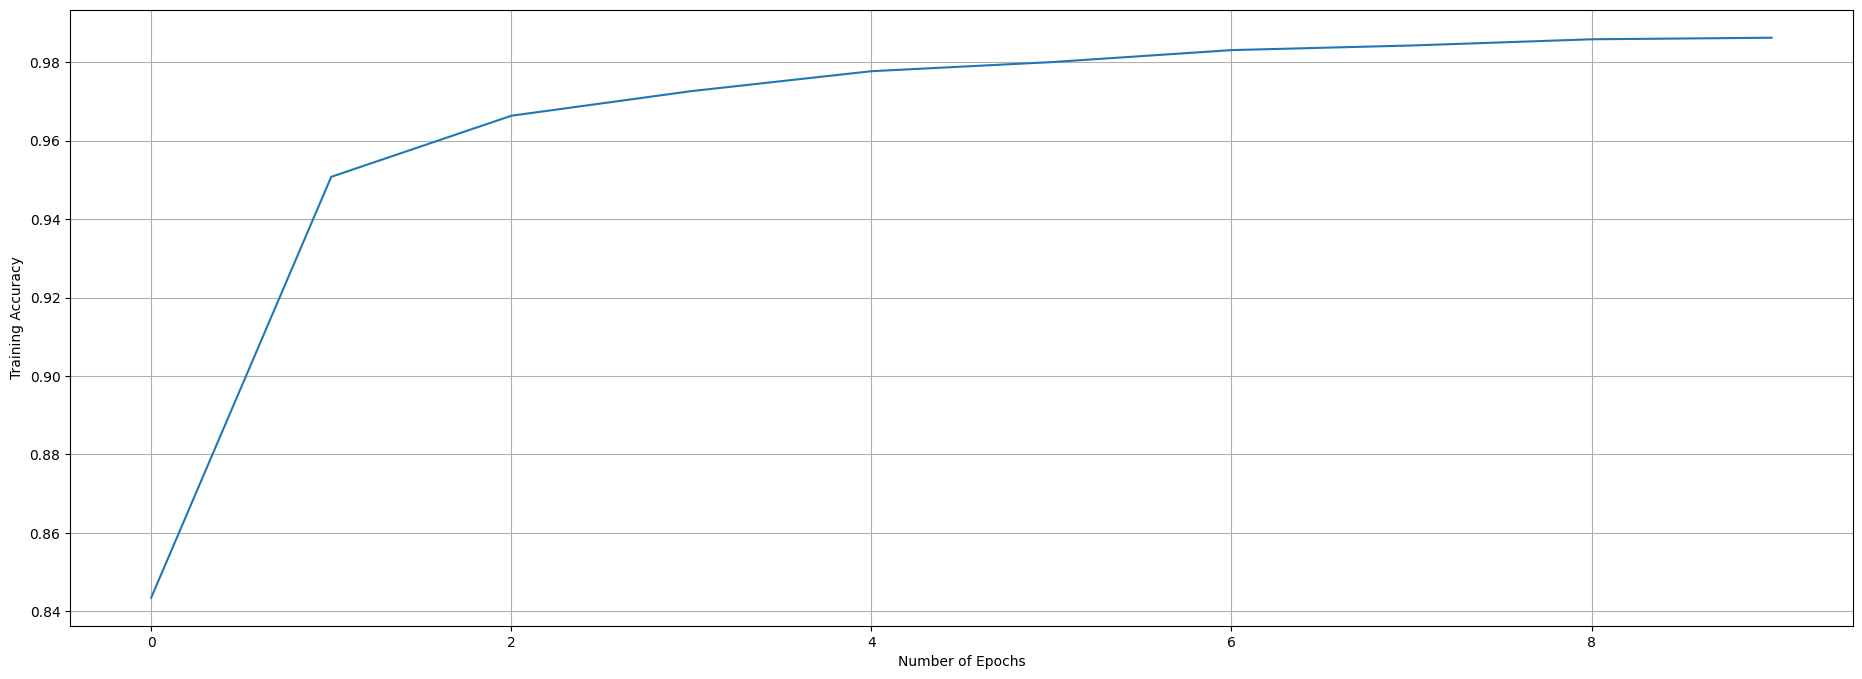

In [22]:
# The matplotlib package is used for plotting graphs
import matplotlib
import matplotlib.pyplot as plt
# Outputs training accuracy and loss against epochs
fig2, ax2=plt.subplots(figsize=(23,8))
ax2.plot(history.history['accuracy'])
ax2.set(xlabel='Number of Epochs', ylabel='Training Accuracy')
ax2.grid()
plt.show()